# NOTEBOOK (2 of 4) - PyR (Chris Engstrom)

## Q2. Should DHPD focus on complaints at particular locations where they are most severe?

## Contents
1. Business Understanding
2. Analytical Approach
3. Data Requirements
4. Data Collection
5. Data Understanding
6. Concluding Remarks

## 1. Business Understanding

Problem Statement - The people of New York use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development (DHPD) of New York City is the agency that processes 311 complaints that are related to housing and buildings. In the last few years, the number of 311 complaints coming to the DHPD has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

The DHPD has approached your organization to help them manage the large volume of 311 complaints they are receiving every year. The agency needs answers to several questions which need to be supported by data and analytics:

    1) Which type of complaint should the DHPD of New York City focus on first?
    2) Should DHPD focus on complaints at particular locations where they are most severe?
    3) Does Complaint Type identified in Q1 have a useful relationship with any particular characteristic(s) of the houses/buildings?
    4) Can a predictive model be built to predict the possibility of future Q1 complaints?
    
Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

## 2. Analytical Approach

Q2) Should the DHPD of NYC focus on any particular set of boroughs, ZIP codes, or street (where Top Complaints are severe) for the specific complaint types identified in response to Q1?

Q2) Analytical Approach - Conduct Data Understanding by applying the following steps to confidently anwser Q2:
        - Render an NYC map to visualize TOP COMPLAINT concentrations by geography.  
        - Explore identified TOP COMPLAINTS by various combinations of geo types (e.g., Borough, Zip, and Street).
        - Plot result and analyze results.
        - Identify optimal geo targeting for TOP COMPLAINT type.
        - Answer Q2.

## 3. Data Requirements

Setup environment. (Note: See Capstone Notebook (1 of 4) for complete details. Q2 will require the NYC 311 complaint dataset).

In [1]:
# Environment Setup
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c1d08c5c14374903951f00633e391147 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='*********',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

In [2]:
# Create credential and bucket variables
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cred = ibm_boto3.client(service_name='s3',
ibm_api_key_id='*************',
ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
config=Config(signature_version='oauth'),
endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

bucket = '************'

## 4. Data Collection

#### Download NYC 311 data from the IBM Cloud Object Store.

In [3]:
#Download the NYC311 file from IBM Cloud Object Store
client_cred.download_file(Bucket=bucket,Key='df_nyc311_raw_cos.pkl',Filename='./df_nyc311_raw_local.pkl')

#Create a dataframe out of the file
df_nyc311 = pd.read_pickle('./df_nyc311_raw_local.pkl')

## 5. Data Understanding

#### 5a. Per Q1 insutructions, restrict dataset by date and view dataset.

In [4]:
# Per instructions in Q1, create new NYC311 df that only includes records with created_date before January 1, 2019.
df_nyc311_dec312018=df_nyc311[df_nyc311['created_date']<'2019']

# View dataframe
df_nyc311_dec312018.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
24698,2018-12-31 14:27:36,41483026,UNSANITARY CONDITION,10459.0,870 LONGWOOD AVENUE,LONGWOOD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.819106,-73.900920,2019-01-22 09:48:15,RESIDENTIAL BUILDING,Closed
24706,2018-12-22 17:55:21,41474482,DOOR/WINDOW,11206.0,676 WILLOUGHBY AVENUE,WILLOUGHBY AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.694654,-73.942323,2019-01-20 11:00:02,RESIDENTIAL BUILDING,Closed
24737,2018-12-28 07:39:31,41382617,PLUMBING,10011.0,175 WEST 12 STREET,WEST 12 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.736853,-73.999726,2019-01-09 11:34:06,RESIDENTIAL BUILDING,Closed
24740,2018-12-15 16:07:02,41379323,ELECTRIC,10473.0,453 ST LAWRENCE AVENUE,ST LAWRENCE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.814464,-73.863268,2019-01-09 18:21:48,RESIDENTIAL BUILDING,Closed
24745,2018-12-31 11:13:46,41374562,PLUMBING,10019.0,36 WEST 56 STREET,WEST 56 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.762824,-73.975745,2019-01-08 07:57:32,RESIDENTIAL BUILDING,Closed


#### 5b. Confirm Max created_date (per Q1 requirements).

In [5]:
# Describe the 'created_date' field for the date restricted dataset.
df_nyc311_dec312018[['created_date']].describe()

,created_date
count,5517069
unique,1295884
top,2013-01-24 00:00:00
freq,7581
first,2010-01-01 00:00:00
last,2018-12-31 23:58:53


Output shows that the Max created_date is now 2018-12-31.

#### 5c. View new dataframe info.

In [6]:
# Dataframe Info.
df_nyc311_dec312018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517069 entries, 24698 to 5865403
Data columns (total 15 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               datetime64[ns]
location_type             object
status                    object
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 673.5+ MB


To begin to answer Q2 we start by running Descriptives on the location-related fields.

#### 5d. Run Descriptives on the (non-numeric) geo felds.

In [7]:
# Run Descriptives on the (non-numeric) geo felds.
df_nyc311_dec312018[['incident_address','street_name','city','borough']].describe()

,incident_address,street_name,city,borough
count,5465464,5465464,5438270,5517069
unique,171230,6668,89,6
top,34 ARDEN STREET,GRAND CONCOURSE,BROOKLYN,BROOKLYN
freq,14069,85087,1869309,1582605


Output shows there are 6 boroughs when 5 were expected.

#### 5e. Run a Frequency of TOTAL complaints (unique_key counts).

In [8]:
# Run sorted Frequency counts on 'complaint_type' for the new dataset.
df_tot_counts = df_nyc311_dec312018['complaint_type'].value_counts()
df_tot_counts

HEAT/HOT WATER            1023788
HEATING                    887869
PLUMBING                   673406
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       390908
PAINT - PLASTER            361258
PAINT/PLASTER              311075
ELECTRIC                   289345
NONCONST                   260890
DOOR/WINDOW                179573
WATER LEAK                 167900
GENERAL                    132207
FLOORING/STAIRS            122869
APPLIANCE                  101944
HPD Literature Request      51604
SAFETY                      44088
OUTSIDE BUILDING             6532
ELEVATOR                     5620
CONSTRUCTION                 5078
Unsanitary Condition          141
General                        70
STRUCTURAL                     16
AGENCY                          9
Safety                          8
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

#### 5f. Run a Frequency of ALL COMPLAINTS by BOROUGH.

In [9]:
df_borough = df_nyc311_dec312018.groupby(['borough'])['unique_key'].count().sort_values(ascending=False)
df_borough

borough
BROOKLYN         1582605
BRONX            1451998
MANHATTAN         949927
Unspecified       871988
QUEENS            581019
STATEN ISLAND      79532
Name: unique_key, dtype: int64

BROOKLYN and BRONX boroughs have the most TOTAL COMPLAINTS.

#### 5g. Restrict records to TOP COMPLAINT types ('HEATING', 'HEAT/HOT WATER') identified in Q1.

In [10]:
# Restrict records to top complaint types ('HEATING', 'HEAT/HOT WATER').
df_top = df_nyc311_dec312018.loc[(df_nyc311_dec312018['complaint_type']=='HEAT/HOT WATER') | (df_nyc311_dec312018['complaint_type']=='HEATING')]
df_top.head()
#df_top.info()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
24773,2018-12-31 23:58:53,41352148,HEAT/HOT WATER,11203.0,388 EAST 54 STREET,EAST 54 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.649257,-73.926218,2019-01-05 02:04:57,RESIDENTIAL BUILDING,Closed
24777,2018-12-31 23:42:18,41349573,HEAT/HOT WATER,11203.0,388 EAST 54 STREET,EAST 54 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.649257,-73.926218,2019-01-05 02:04:57,RESIDENTIAL BUILDING,Closed
24796,2018-12-31 21:19:47,41333658,HEAT/HOT WATER,10452.0,1321 PLIMPTON AVENUE,PLIMPTON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.840642,-73.924379,2019-01-03 17:25:25,RESIDENTIAL BUILDING,Closed
24798,2018-12-30 10:02:06,41332603,HEAT/HOT WATER,11694.0,106-10 SHORE FRONT PARKWAY,SHORE FRONT PARKWAY,ADDRESS,Rockaway Park,The Department of Housing Preservation and Dev...,QUEENS,40.580979,-73.825831,2019-01-03 11:05:37,RESIDENTIAL BUILDING,Closed
24801,2018-12-30 13:53:11,41329931,HEAT/HOT WATER,11432.0,150-11 88 AVENUE,88 AVENUE,ADDRESS,Jamaica,The Department of Housing Preservation and Dev...,QUEENS,40.705786,-73.805819,2019-01-03 11:21:11,RESIDENTIAL BUILDING,Closed


As expected, there are 1,911,657 records where 'complaint_type' is 'HEATING' or 'HEAT/HOT WATER'.

#### 5h. Run and plot frequency of TOP COMPLAINTS by BOROUGH.

In [11]:
df_top_borough = df_top.groupby(['borough'])['unique_key'].count().sort_values(ascending=False)
df_top_borough

borough
BRONX            526447
BROOKLYN         504334
MANHATTAN        370339
Unspecified      282917
QUEENS           211583
STATEN ISLAND     16037
Name: unique_key, dtype: int64

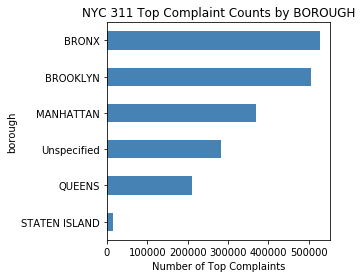

In [12]:
# Import Matplotlib.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Sort dataframe 
df_top_borough.sort_values(ascending=True, inplace=True)

# Generate plot
df_top_borough.plot(kind='barh', figsize=(4, 4), color='steelblue')
plt.xlabel('Number of Top Complaints')
plt.title('NYC 311 Top Complaint Counts by BOROUGH')
plt.show()

#### Results:
- BRONX has the most TOP COMPLAINTS though only marginally more than BROOKLYN.
- Looking at TOP COMPLAINTS as a % of TOTAL COMPLAINTS
    - MANHATTAN   39%
    - BRONX       36%
    - QUEENS      36%
    - BROOKLYN    32%
    - STATEN I.   20%
- This analysis points slightly toward MANHATTAN (39%) and BRONX (32%).
- Given the number of addresses and zips in each BOROUGH, BOROUGH alone is probably not the most cost-effective way to target top complaints.

Other Notes:
- There are 282,917 "Unspecified" complaints unaccounted for by BOROUGH. 
- An online search revealed zips are mutually exclusive to NYC boroughs. 
- Later on, we can consider mapping 'Unspecified' complaints to BOROUGH by use of ZIP.

#### 5i. Produce a map visualization of TOP COMPLAINTS (using Latitiude and Longitude).

In [13]:
# Drop Nan rows
#df_top.dropna(subset=['latitude','longitude'],axis=0, inplace=True) # note: does not change df
df_top.dropna(how='any',axis=0, inplace=True)
#df_top.info()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [15]:
# Install Folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# Randomly sample dataframe
df_top_n001 = df_top.sample(frac=0.001, replace=True, random_state=1)

# Define map centered around NYC
latitude = 40.7128
longitude = -74.0060

# Create map
nyc_n001 = folium.Map(location=[latitude, longitude], zoom_start=11)

# Instantiate a feature group for Top Complaints incidents
complaints = folium.map.FeatureGroup()

# Add Top Complaint incidents to the feature group
for lat, lng, in zip(df_top_n001.latitude, df_top_n001.longitude):
        complaints.add_child(folium.features.CircleMarker([lat, lng], radius=0.025, color='red', fill=True, fill_color='blue', fill_opacity=0.6))

# Add incidents to the map
nyc_n001.add_child(complaints)
        
# Display map
nyc_n001

Solving environment: done

# All requested packages already installed.



#### Results:
- The map visually indicates 3 main areas of TOP COMPLAINT concentration:
    - Far north MANHATTAN
    - West central BRONX
    - Central BROOKLYN
- This is consistent with the TOP COMPLAINTS by BOROUGH frequencies in the previous section (5h.). 
- To explore these areas let's run frequency analyses on various geo field combinations (Street, Zip, Borough).

#### 5j. Plot TOP COMPLAINTS by ZIP.

In [16]:
# Run frequencies.
df_top_zip = df_top.groupby(['incident_zip'])['unique_key'].count().sort_values(ascending=False)

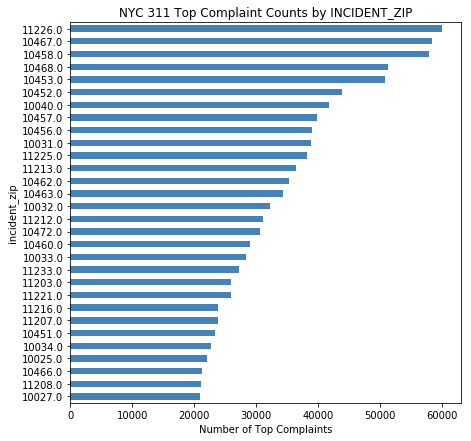

In [17]:
# Sort dataframe 
df_top_zip.sort_values(ascending=True, inplace=True)

# Generate plot
df_top_zip_20 = df_top_zip.tail(30)
df_top_zip_20.plot(kind='barh', figsize=(7, 7), color='steelblue')
plt.xlabel('Number of Top Complaints')
plt.title('NYC 311 Top Complaint Counts by INCIDENT_ZIP')
plt.show()

#### Results:
- There is significant variation of TOP COMPLAINTS by ZIP.
- (7 of 10) top zips are in BRONX vs. (2 of 10) MANHATTAN and (1 of 10) BROOKLYN.
- (11 of 20) top zips are in BRONX vs. (4 of 10) MANHATTAN and (5 of 20) BROOKLYN.
- This suggests top complaint zips may be more useful for targeting in the BRONX.
- Note however, that 6 MANHATTAN ZIPS are CONTIGUOUS (good for targeting) and in the top 30 ZIPS (10040, 10031, 10032, 10033, 10034, 10027). 

#### 5k. Plot TOP COMPLAINTS by STREET.

In [18]:
# Run frequencies
df_top_street = df_top.groupby(['street_name'])['unique_key'].count().sort_values(ascending=False)

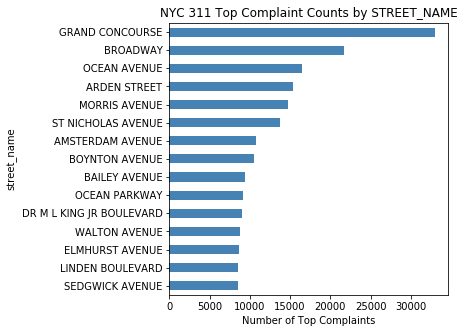

In [19]:
# Sort dataframe 
df_top_street.sort_values(ascending=True, inplace=True)

# Generate plot
df_top_street_15 = df_top_street.tail(15)
df_top_street_15.plot(kind='barh', figsize=(5, 5), color='steelblue')
plt.xlabel('Number of Top Complaints')
plt.title('NYC 311 Top Complaint Counts by STREET_NAME')
plt.show()

#### Results:
- There is significant variation of TOP COMPLAINTS by STREET. 
- Top STREET breakdown by BOROUGH
    - BRONX (GRAND CONCOURSE, MORRIS, BOYNTON, BAILEY, MLK BLVD, WALTON)
    - MANHATTAN (BROADWAY, ARDEN, ST NICHOLAS, AMSTERDAAM, RIVERSIDE)
    - BROOKLYN (OCEAN AVE, OCEAN PARKWAY, LINDEN)
    
- This analysis points toward MANHATTAN and BRONX as areas of continued deeper geo targeting focus. 
- The STREET field may be useful for more cost-effective TOP COMPLAINT tartgeting.
- Let's combine it with the other fields.
- Note: ADDRESS was not explored as it is likely too granular for cost-effective targeting. It may be utilized at a later time.

#### 5l. Plot TOP COMPLAINTS by BOROUGH by STREET.

In [20]:
# Run frequencies
df_top_BxS = df_top.groupby(['borough','street_name',])['unique_key'].count().sort_values(ascending=False)

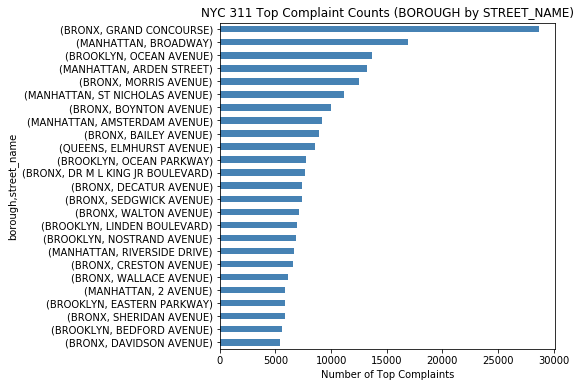

In [21]:
# Sort dataframe 
df_top_BxS.sort_values(ascending=True, inplace=True)

# Generate plot
df_top_BxS_40 = df_top_BxS.tail(25)
df_top_BxS_40.plot(kind='barh', figsize=(6, 6), color='steelblue')
plt.xlabel('Number of Top Complaints')
plt.title('NYC 311 Top Complaint Counts (BOROUGH by STREET_NAME)')
plt.show()

#### Results:
- There is significant variation of TOP COMPLAINTS by BOROUGH by STREET. 
- The BRONX STREET 'GRAND CONCOURSE' by far has the most TOP COMPLAINTS.
- (12 of top 25) are in BRONX vs. (6 of 25) MANHATTAN vs. (6 of 25) for BROOKLYN.
- STREET most likely will be useful for cost-effective TOP COMPLAINT tartgeting.
- This also suggests BRONX may be the best BOROUGH for further targeting and modeling.

#### 5m. Plot TOP COMPLAINTS by BOROUGH by ZIP.

In [22]:
# Run frequencies
df_top_BxZ = df_top.groupby(['borough','incident_zip',])['unique_key'].count().sort_values(ascending=False)

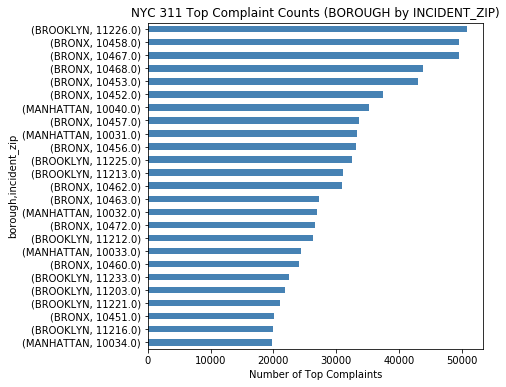

In [23]:
# Sort dataframe 
df_top_BxZ.sort_values(ascending=True, inplace=True)

# Generate plot
df_top_BxZ_40 = df_top_BxZ.tail(25)
df_top_BxZ_40.plot(kind='barh', figsize=(6, 6), color='steelblue')
plt.xlabel('Number of Top Complaints')
plt.title('NYC 311 Top Complaint Counts (BOROUGH by INCIDENT_ZIP)')
plt.show()

#### Results:
- There is significant variation of TOP COMPLAINTS by BOROUGH by ZIP. 
- (7 of top 10) are in BRONX vs. (2 of 10) MANHATTAN and (1 of 10) for BROOKLYN.
- (11 of top 20) are in BRONX vs. (4 of 20) MANHATTAN and (5 of 20) for BROOKLYN.
- This combination of fields may be useful for cost-effective TOP COMPLAINT tartgeting.
- This also suggests BRONX is the best BOROUGH for initial targeting and modeling.

#### 5n. Plot TOP COMPLAINTS by BOROUGH by ZIP by STREET.

In [24]:
# Run frequencies
df_top_BxZxS = df_top.groupby(['borough','incident_zip','street_name',])['unique_key'].count().sort_values(ascending=False)

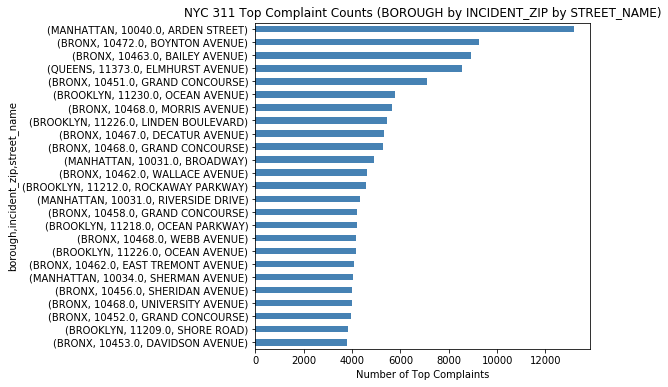

In [25]:
# Sort dataframe 
df_top_BxZxS.sort_values(ascending=True, inplace=True)

# Generate plot
df_top_BxZxS_40 = df_top_BxZxS.tail(25)
df_top_BxZxS_40.plot(kind='barh', figsize=(6, 6), color='steelblue')
plt.xlabel('Number of Top Complaints')
plt.title('NYC 311 Top Complaint Counts (BOROUGH by INCIDENT_ZIP by STREET_NAME)')
plt.show()

#### Results:
- There is significant variation of TOP COMPLAINTS by BOROUGH by ZIP by STREET. 
- (6 of top 10) are in BRONX vs. (1 of 10) MANHATTAN vs. (2 of 10) BROOKLYN.
- (10 of top 20) are in BRONX vs. (4 of 20) MANHATTAN vs. (5 of 20) BROOKLYN.
- The street GRAND CONCOURSE contains a highly concentrated group of TOP COMPLAINTS and is a great place to start for cost-effective targeting.
- GRAND CONCOURSE Top Complaints also are highly concentrated in the following CONTIGUOUS Zipcodes: 10451, 10452, 10457, 10458, and 10468.

# 6. CONCLUDING REMARKS (Q2):

Q2. Should the DHPD focus on complaints for any particular locations where they are most severe?

ANSWER: 
- Yes. Initially DHPD should focus on specific INCIDENT_ZIPs and STREET_NAMEs in the BRONX. 
- Initially the street GRAND CONCOURSE should be used for cost-effective targeting as it contains high concentrations of TOP COMPLAINTS.
- Also, GRAND CONCOURSE Top Complaints are highly concentrated in the following CONTIGUOUS Zipcodes: 10451, 10452, 10457, 10458, and 10468.
- The final application of ZIPs and STREETS will depend on the level of complaint targeting resources DHPD is willing to commit to the problem.

Results/Analysis Summary 
- BRONX and BROOKLYN together account for roughly half of these complaints with BRONX having marginally more top complaints.
- BRONX and MANHATTAN however have the highest % of TOP COMPLATINS and a % of TOTAL COMPLAINTS.
- Cost-effective top complaint targeting will likely need to happen at a more granular level within a top borough (i.e., STREET and/or ZIP level).
- When plotted on a map there visually are 3 main high concentration levels: North MANHATTAN, West central BRONX, and central BROOKLYN.
- STREET and ZIP can be useful for targeting as they show strong variance in terms of concentration of top complaints.
- When STREET and ZIP variance is examined by BRONX, MANHATTAN, and BROOKLYN, the data suggest that Top Complaint targeting should start in the BRONX.
- However, the following MANHATTAN ZIPS are CONTIGUOUS (maybe good for targeting) and in the top 30 ZIPS (10040, 10031, 10032, 10033, 10034, 10027).
- If STREET and ZIP targetting in the BRONX is not useful for Q3/Q4 then this area of MANHATTAN will be a good area to focus on.

Stakeholder Questions (To optimize geo targeting, the following needs clarification with DHPD stakeholders):
1. How many TOP COMPLAINTS can be effectively targeted given limited DHPD resources? This can impact geo prioritization and model design.
2. Does it make sense to re-run the analysis to look at TOP COMPLAINTS as a % of TOTAL COMPLAINTS? Would these results be more actionable?
    
Other Considerations (problem formulation ideas to refine the analysis and model down the road):
- Further restrict dataset by excluding records with dates prior to 2015 (or maybe even later). 
- The idea is that the relevance of complaints diminishes with age and considering only more recent complaints will deliver a better result. 
- Examining ('HEAT/HOT WATER' and 'HEATING') complaints as a % of Total complaints and whether this rate has changed over the last few years. 
    

## END OF NOTEBOOK (2 of 4)